# Gravitational waves data Analysis 

In [88]:
%matplotlib notebook
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
import GW_generator as GW
print('Python version ' + sys.version)
print('numpy version ' + np.__version__)
#print('matplotlib version ' + matplotlib.__version__)

Python version 3.7.6 (default, Jan  8 2020, 13:42:34) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy version 1.18.1


## Read data

In [89]:
df_noise = pd.read_csv('<DATA FILE>',delimiter = ' ',header = None,names  = ['idx','data'], dtype  = {'idx': np.float,'data':np.float})

df_data = pd.read_csv('<INJECTION FILE>',delimiter = ' ',header = None,names  = ['idx','data'], dtype  = {'idx': np.float,'data':np.float})


In [90]:
scan_rate_hz = 2000
injection_signal_samples = 16000
dt = 1./scan_rate_hz
data_size = len(df_data)
data_times = np.arange(data_size) * dt


<IPython.core.display.Javascript object>


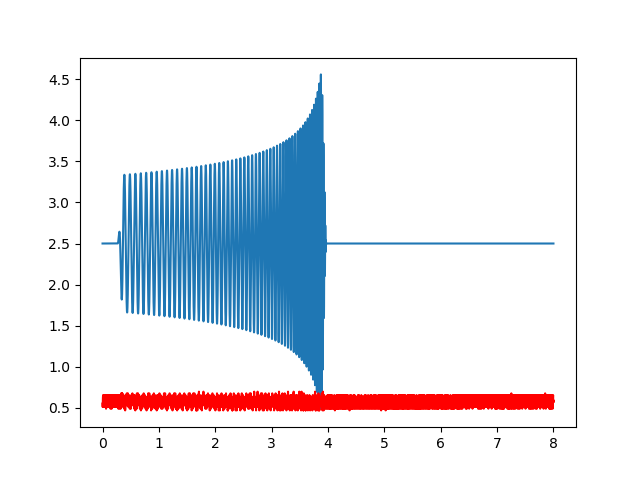

In [91]:
plt.figure()
plt.plot(data_times,df_data['idx'])
plt.plot(data_times,df_noise['idx'], color = 'red')
plt.show()


# Fourier Transformation

In [92]:
# Let's calculate the Fourier transforms of noise and signal

frequencies = np.fft.rfftfreq(data_size, dt)
df = frequencies[1]  # spacing in frequency space
print (len(frequencies))


8001


In [93]:
noise_fourier = np.fft.rfft(df_noise["idx"], norm='ortho') * np.sqrt(dt)
data_fourier = np.fft.rfft(df_data["idx"], norm=None, n = data_size) * dt


<IPython.core.display.Javascript object>


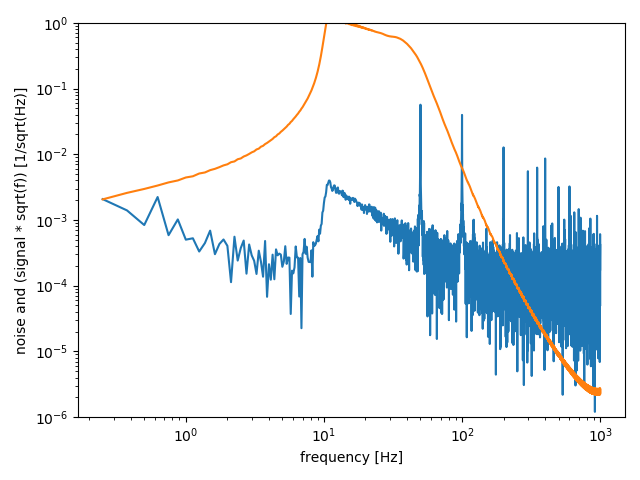

In [94]:
plt.figure()
plt.loglog(frequencies[2:], np.abs(noise_fourier[2:]))
plt.loglog(frequencies[2:], np.sqrt(frequencies[2:]) * np.abs(data_fourier[2:]))
plt.ylim(1.e-6, 1.)
plt.xlabel('frequency [Hz]')
plt.ylabel('noise and (signal * sqrt(f)) [1/sqrt(Hz)]')
plt.tight_layout()


# Noise Analysis

In [95]:
#Noise analysis : Clean the data

#    ???

#    ???

data_fourier_clean = <CLEANED DATA (for example data_fourier)>


<IPython.core.display.Javascript object>


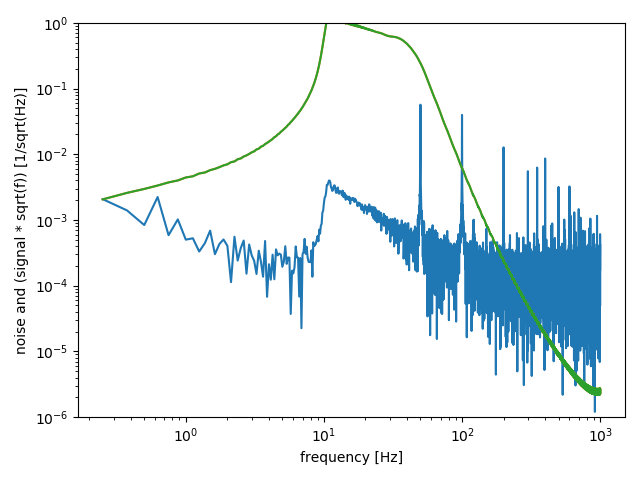

In [96]:
plt.figure()
plt.loglog(frequencies[2:], np.abs(noise_fourier[2:]))
plt.loglog(frequencies[2:], np.sqrt(frequencies[2:]) * np.abs(data_fourier[2:]))
plt.loglog(frequencies[2:], np.sqrt(frequencies[2:]) *np.abs(data_fourier_clean[2:]))
plt.ylim(1.e-6, 1.)
plt.xlabel('frequency [Hz]')
plt.ylabel('noise and (signal * sqrt(f)) [1/sqrt(Hz)]')
plt.tight_layout()


In [97]:
# Signal power

signal_power = 2 * np.real(np.dot(data_fourier_clean, data_fourier_clean)) * df / frequencies.max()
noise_power = np.real(np.dot(noise_fourier, np.conj(noise_fourier))) * df / frequencies.max()

print('noise power spectral density = {:.2e} 1/Hz'.format(noise_power))
print('cleaned data spectral density = {:.2e} 1/Hz'.format(signal_power))


noise power spectral density = 3.32e-04 1/Hz
cleaned data spectral density = 1.00e-01 1/Hz


In [98]:
# signal-to-noise ratio

optimal_snr = np.sqrt(abs(signal_power / noise_power))
print('The optimal SNR of the signal is {:.1f}'.format(optimal_snr))


The optimal SNR of the signal is 17.3


# Find the masses of the binary (m1 = m2)

nombre de points :  3766  durée analytique tc (s):  1.8832880875494968


<IPython.core.display.Javascript object>


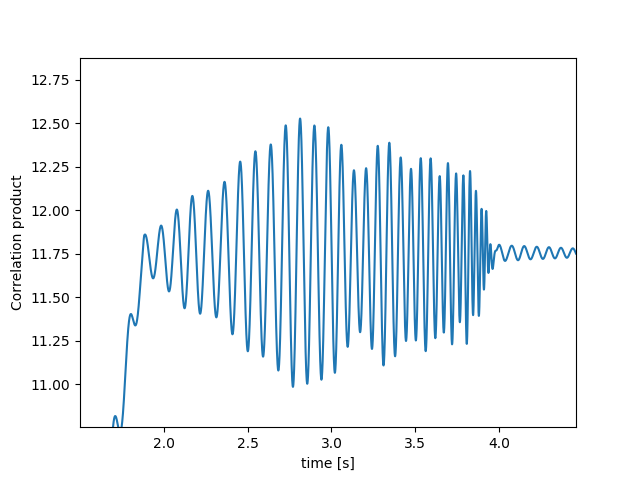

In [110]:
# 1)Try to correlate a template with your data

GW.generation(35.,35.,10000.,scan_rate_hz)

df_template = pd.read_csv('template.txt',delimiter = ' ',header = None,names  = ['idx','data'], dtype  = {'idx': np.float,'data':np.float})
template = 40.e15*df_template['idx'].astype(float) + 2.5

#corr = np.correlate(np.real(<CLEAN DATA>),np.conj(template),'full')

corr_times = np.arange(len(corr)) * dt

plt.figure()
plt.plot(corr_times,corr)
plt.xlabel('time [s]')
plt.ylabel('Correlation product')
plt.show()
    

In [100]:
# 2)Turn on templates to find the optimal corellation product as a function on the masses.


%matplotlib notebook
